In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyvi import ViTokenizer
from preprocessing import *
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.datasets import load_files
from pyvi import ViTokenizer
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

%matplotlib inline

In [4]:
dataset = pd.read_csv("final_label_data.csv")
dataset

,comment,Label
0,"Ko lên số , dây dễ đứt nút bấm hoài không lên",-2.0
1,"Loa nhỏ, khi call bị lỗi",-2.0
2,Hàng ko ra gì hàng thì cũ mặt xước hiển thị th...,-2.0
3,d,0.0
4,Sản phẩm kém chất lượng sạc mãi mà không vào pin,-2.0
...,...,...
1683,1 chiếc loa khá là xịn sò,2.0
1684,Đánh giá nhận xu hướng thời trang r cồn các ki...,0.0
1685,"đóng gói kỹ, nghe ổn phết, tặng kèm 2 quả dây ...",2.0
1686,Giao hàng lâu kinh khủng...hàng về ok đóng gói...,0.0


In [37]:
count = 0
for i in range(len(dataset)):
    if dataset['Label'][i] == -2.0:
        count = count + 1
   


In [38]:
count

711

In [ ]:
listlabel = list(dataset['Label'])
print(listlabel)

In [12]:
count_label_by_dict = {item:listlabel.count(item) for item in listlabel}

In [13]:
count_label_by_dict

{-2.0: 711, 0.0: 223, 2.0: 328, -1.0: 126, 1.0: 300}

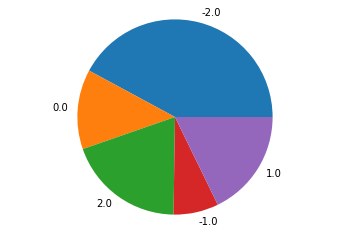

In [16]:
# Data to plot
labels = []
sizes = []

for x, y in count_label_by_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

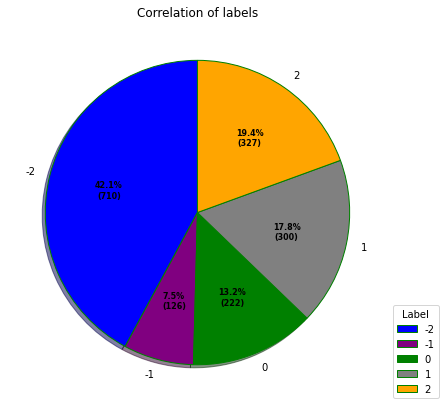

In [29]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
cars = ['-2', '-1', '0',
		'1', '2']

data = [711, 126, 223, 300, 328]


# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0, 0.0)

# Creating color parameters
colors = ( "blue", "purple", "green",
		"grey", "orange")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = cars,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, cars,
		title ="Label",
		loc ="lower left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Correlation of labels")

# show plot
plt.show()


In [34]:
cmt = list(dataset['comment'])
cmt

['Ko lên số , dây dễ đứt nút bấm hoài không lên',
 'Loa nhỏ, khi call bị lỗi',
 'Hàng ko ra gì hàng thì cũ mặt xước hiển thị thì nhảy loạn nói chung là bị  lỗi nhưng shop vẫn giao  shop làm ăn ko uy tín chỉ làm đồ chơi cho trẻ con',
 'd',
 'Sản phẩm kém chất lượng sạc mãi mà không vào pin',
 'Mình quá chán với shop này luôn đồng hồ hàng Trung Quốc gửi hàng lâu thì thôi mình cũng không nói gì nhưng mà mặt đồng hồ bị trầy, khó chỉnh giờ mình nt thì shop không thèm trả lời',
 'Mua ba cái thì hai cái Casio còn ok,đến cái này thì như đb vậy, phí tiền, ms mua về mà báo hết pin,cứ nhấp nháy, chỉnh giờ thì k chỉnh được',
 'mình thề là mình mua nó chỉ vì cái MÀU :::::)))) nhận đc cái màu héo úa tựa như màu áo lính sờn phai vì gió bão mưa sa mà lòng nặng trĩu. hoàn toàn ko chú ý đến chất lượng hay giá cả, nên trừ sạch sao vì tội sai màu (và mình cũng ko biết cách chỉnh thời gian, khó xài cực kỳ)',
 'Không hiểu sao JTExpress bắt mình ra bưu cục nhận hàng.\nRất bực. 1 cái giao về tận nhà ở Vũng Tà

In [63]:
pre_cmt = list(map(text_preprocess, dataset['comment']))


In [64]:
pre_cmt

['ko lên số dây dễ đứt nút bấm hoài không lên',
 'loa nhỏ khi call bị lỗi',
 'hàng ko ra gì hàng thì cũ mặt xước hiển_thị thì nhảy loạn nói_chung là bị lỗi nhưng shop vẫn giao_shop làm_ăn ko uy_tín_chỉ làm đồ_chơi cho trẻ_con',
 'd',
 'sản_phẩm kém chất_lượng sạc mãi mà không vào pin',
 'mình quá chán với shop này luôn đồng_hồ hàng trung_quốc gửi hàng lâu thì thôi mình cũng không nói gì nhưng mà mặt đồng_hồ bị trầy khó chỉnh giờ mình nt thì shop không thèm trả_lời',
 'mua ba cái thì hai cái casio còn ok đến cái này thì như đb vậy phí tiền ms mua về mà báo hết pin cứ nhấp_nháy chỉnh giờ thì k chỉnh được',
 'mình thề là mình mua nó chỉ vì cái màu nhận đc cái màu héo úa tựa như màu áo lính sờn phai vì gió_bão mưa sa mà lòng nặng_trĩu hoàn_toàn ko chú_ý đến chất_lượng hay giá_cả nên trừ sạch sao vì tội sai màu và mình cũng ko biết cách chỉnh thời_gian khó xài cực_kỳ',
 'không hiểu sao jtexpress bắt mình ra bưu_cục nhận hàng rất bực 1 cái giao về tận nhà ở vũng_tàu còn 1 cái giao ở hcm bị v

In [71]:
with open('/Users/nguyen/Documents/DemoDs103/preprocess_document.txt', 'w') as f:
    for item in pre_cmt:
        f.write("%s\n" % item)

In [68]:
def countinfile(filename):
    d = {}
    with open(filename, "r") as fin:
        for line in fin:
            words = line.strip().split()
            for word in words:
                try:
                    d[word] += 1
                except KeyError:
                    d[word] = 1
    return d

In [73]:
counter = countinfile('/Users/nguyen/Documents/DemoDs103/preprocess_document.txt')
counter 

{'ko': 354,
 'lên': 55,
 'số': 20,
 'dây': 122,
 'dễ': 22,
 'đứt': 8,
 'nút': 57,
 'bấm': 54,
 'hoài': 9,
 'không': 531,
 'loa': 225,
 'nhỏ': 95,
 'khi': 124,
 'call': 1,
 'bị': 269,
 'lỗi': 82,
 'hàng': 782,
 'ra': 98,
 'gì': 98,
 'thì': 435,
 'cũ': 21,
 'mặt': 55,
 'xước': 68,
 'hiển_thị': 8,
 'nhảy': 6,
 'loạn': 2,
 'nói_chung': 40,
 'là': 247,
 'nhưng': 384,
 'shop': 341,
 'vẫn': 114,
 'giao_shop': 1,
 'làm_ăn': 14,
 'uy_tín_chỉ': 1,
 'làm': 36,
 'đồ_chơi': 6,
 'cho': 188,
 'trẻ_con': 5,
 'd': 12,
 'sản_phẩm': 228,
 'kém': 51,
 'chất_lượng': 226,
 'sạc': 65,
 'mãi': 31,
 'mà': 310,
 'vào': 69,
 'pin': 132,
 'mình': 308,
 'quá': 165,
 'chán': 37,
 'với': 209,
 'này': 123,
 'luôn': 87,
 'đồng_hồ': 208,
 'trung_quốc': 5,
 'gửi': 71,
 'lâu': 185,
 'thôi': 68,
 'cũng': 214,
 'nói': 66,
 'trầy': 32,
 'khó': 43,
 'chỉnh': 110,
 'giờ': 82,
 'nt': 15,
 'thèm': 11,
 'trả_lời': 67,
 'mua': 396,
 'ba': 2,
 'cái': 188,
 'hai': 11,
 'casio': 2,
 'còn': 125,
 'ok': 165,
 'đến': 67,
 'như': 182,
 

In [76]:
with open("/Users/nguyen/Documents/DemoDs103/counter.txt", 'w') as f: 
    for key, value in counter.items(): 
        f.write('%s:%s\n' % (key, value))

In [86]:
fin_max = max(counter, key=counter.get)
print(fin_max)
print(counter['hàng'])

hàng
782


In [79]:
print(counter['ok'])

165


In [77]:
import statistics
from statistics import mode
 
def most_common(list):
    return(mode(list))
   
print(most_common(pre_cmt))

ok


In [5]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [ ]:
word_count()